In [9]:
import pysam
import numpy as np
import pandas as pd
from tqdm import tqdm
from pyfaidx import Fasta


samfile1 = pysam.AlignmentFile("/Volumes/Extreme SSD/HP/cap1_FTO_test_fix.bam", "rb")
samfile2 = pysam.AlignmentFile("/Volumes/Extreme SSD/HP/cap2_FTO_test_fix.bam", "rb")

file_path = "/Volumes/Extreme SSD/HP/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna"
fasta = Fasta(file_path)

In [10]:
reads1 = []
reads2 = []
for i in range(23):
    reads1.append([])
    reads2.append([])
i = 1
for i in range(1,24):
    if i==23:
        for read in samfile2.fetch('chrX'):
            reads2[i-1].append(read) 
        for read in samfile1.fetch('chrX'):
            reads1[i-1].append(read)     
    else:
        for read in samfile1.fetch(f'chr{i}'):
            reads1[i-1].append(read)
        for read in samfile2.fetch(f'chr{i}'):
            reads2[i-1].append(read)
    i+=1

In [11]:
def chr_loc(chromosome, position):
    # Open the FASTA file using pyfaidx, which will use the FAI index for fast access
    # Fetch the base pair from the specified chromosome and position (1-based indexing)
    try:
        basepair = fasta[chromosome][position - 1]  # pyfaidx uses 0-based indexing internally
        return basepair
    except KeyError:
        return f"Chromosome {chromosome} not found in the FASTA file."
    except IndexError:
        return f"Position {position} is out of range for chromosome {chromosome}."

In [12]:
pos_methylation = []
pos_is_A = []
reads1_bins = []
for i in range(40):
    pos_methylation.append(0)
    pos_is_A.append(0)
for i in range(23):
    reads1_bins.append([])
    for j in tqdm(range(len(reads1[i]))):
        read1_bin_fwd = []
        read1_bin_rev = []
        for k in range(len(reads1[i][j].query_sequence)):
            if reads1[i][j].is_forward==True:
                if chr_loc(f'chr{i+1}', reads1[i][j].reference_end-(40-(k+1))) == 'A':
                    if reads1[i][j].query_sequence[k] == 'A' or reads1[i][j].query_sequence[k] == 'G':
                        pos_is_A[k]+=1
                    if reads1[i][j].query_sequence[k] == 'A':
                        pos_methylation[k]+=1
                        read1_bin_fwd.append(0)
                    else: read1_bin_fwd.append(0.5)
                else: read1_bin_fwd.append(1)
            if reads1[i][j].is_forward==False:
                if chr_loc(f'chr{i+1}', reads1[i][j].reference_end-k) == 'T':
                    if reads1[i][j].query_sequence[40-k-1] == 'T' or reads1[i][j].query_sequence[40-k-1] == 'C':
                        pos_is_A[k]+=1
                    if reads1[i][j].query_sequence[40-k-1] == 'T':
                        pos_methylation[k]+=1
                        read1_bin_rev.append(0)
                    else: read1_bin_rev.append(0.5)
                else: read1_bin_rev.append(1)
        if len(read1_bin_fwd) == 40:
            reads1_bins[i].append(read1_bin_fwd)
        if len(read1_bin_rev) == 40:
            reads1_bins[i].append(read1_bin_rev)



100%|███████████████████████████████████████████████████████████████████████████████████████| 499472/499472 [00:14<00:00, 34393.65it/s]


In [13]:
pos_methylation2 = []
pos_is_A2 = []

for i in range(40):
    pos_methylation2.append(0)
    pos_is_A2.append(0)
for i in range(23):
    for j in tqdm(range(len(reads2[i]))):
        for k in range(len(reads2[i][j].query_sequence)):
            if reads2[i][j].is_forward==True:
                if chr_loc(f'chr{i+1}', reads2[i][j].reference_end-(40-(k+1))) == 'A':
                    if reads2[i][j].query_sequence[k] == 'A' or reads2[i][j].query_sequence[k] == 'G':
                        pos_is_A2[k]+=1
                    if reads2[i][j].query_sequence[k] == 'A':
                        pos_methylation2[k]+=1
            if reads2[i][j].is_forward==False:
                if chr_loc(f'chr{i+1}', reads2[i][j].reference_end-k) == 'T':
                    if reads2[i][j].query_sequence[40-k-1] == 'T' or reads2[i][j].query_sequence[40-k-1] == 'C':
                        pos_is_A2[k]+=1
                    if reads2[i][j].query_sequence[40-k-1] == 'T':
                        pos_methylation2[k]+=1
            

100%|███████████████████████████████████████████████████████████████████████████████████████| 327428/327428 [00:09<00:00, 35493.46it/s]


In [14]:
loc_percent_methylation = []
for i in range(40):
    loc_percent_methylation.append(pos_methylation[i]/pos_is_A[i]*100)
loc_percent_methylation2 = []
for i in range(40):
    loc_percent_methylation2.append(pos_methylation2[i]/pos_is_A2[i]*100)

[52.80562065087352, 2.900854252193245, 3.0484716364949085, 2.989687256466628, 3.0081811146621913, 2.9852237155032735, 3.1628632837401462, 3.1905205762121405, 3.2829555046099634, 3.2544872017824007, 3.294720134510648, 3.317401994905684, 3.4211364890506974, 3.4121143142591968, 3.5254145955452594, 3.4360582519050444, 3.5741817378708727, 3.5713787005759445, 3.7282220821538794, 3.7886533723842972, 3.8531384774959077, 3.860384291284031, 3.740254409034413, 3.9012361965808653, 3.8868120194578233, 3.99133390726685, 4.186311812891441, 4.223150303054938, 4.284494548837944, 4.414978454545766, 4.366975841826794, 4.3951013052320365, 4.500624618891125, 4.473843458175797, 4.613943616040547, 4.660771907991662, 4.71647239584891, 4.677873783232798, 4.777273738960483, 4.791973111433304]
[53.316735765959756, 2.756466199303751, 2.721373753732869, 2.6764680361127624, 3.030447776608723, 2.6140776640880854, 2.608065577760201, 3.030057720029572, 3.1336195915575273, 3.1118510717867913, 2.997401904539176, 3.16791

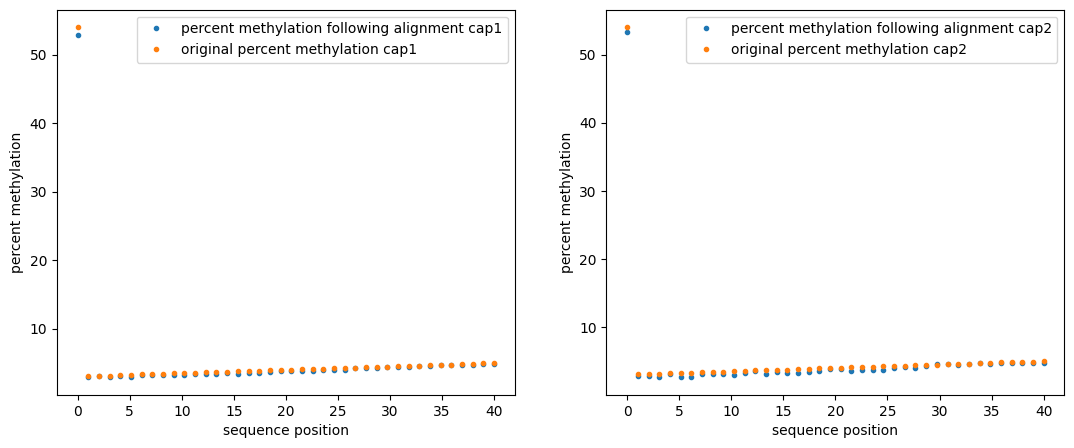

In [18]:
import matplotlib.pyplot as plt
# Methyation levels calculated before alignments cap1
og_methylation1 = [54.01082206656036, 3.0713944519958023, 3.1181176857153785, 3.1522312882772305, 3.17343711992216, 3.2557201410916106, 3.3182872352016437, 3.3487893173224745, 3.3814480049956854, 3.447789806044204, 3.519329978516833, 3.5403221161735097, 3.5937243598433226, 3.6473308042270833, 3.6789388321986314, 3.7700362984372653, 3.8361330885416356, 3.8342489992479285, 3.9152678469009294, 3.9461441866214972, 3.991373139774785, 4.045830584058476, 4.088158189411005, 4.12515686258703, 4.214469619213531, 4.246359609033952, 4.29922622199076, 4.359877945258908, 4.411705447634434, 4.4551751737044185, 4.509284418347543, 4.546027266083713, 4.593637713372047, 4.6270961708417335, 4.676595514342636, 4.749783015491697, 4.812991279429565, 4.835726042656032, 4.91035062406804, 4.964137050558859]

figure, axis = plt.subplots(1, 2)
axis[0].plot(np.linspace(0,40,40),  loc_percent_methylation, '.', label = "percent methylation following alignment cap1")
axis[0].plot(np.linspace(0,40,40), og_methylation1, '.', label = "original percent methylation cap1")
axis[0].set_ylabel("percent methylation")
axis[0].set_xlabel("sequence position")
axis[0].legend()

# Methylation levels calculated before alignments cap2
og_methylation2 = [54.01395109249545, 3.083134458452924, 3.106140074416592, 3.1320211955891617, 3.199703910288503, 3.2575355344455006, 3.2582232582232584, 3.3348688852476225, 3.380933310073882, 3.445554852129872, 3.4968641715442805, 3.537417568288417, 3.5974615530221263, 3.6770601019619082, 3.7130587997215603, 3.726510129902739, 3.827229731706045, 3.836043656352702, 3.8977183149449535, 3.928296984597727, 4.026130777901129, 4.038455332073482, 4.086490155114298, 4.127711837392886, 4.205311788787001, 4.2365444373310694, 4.304997886029168, 4.355220253356687, 4.408065499908731, 4.416615046068676, 4.512192330290444, 4.575057368877458, 4.584870361170713, 4.651972246274264, 4.6976921592150624, 4.783221404947007, 4.829351938806835, 4.853713311898881, 4.866224013524605, 4.949873474328296]
axis[1].plot(np.linspace(0,40,40), loc_percent_methylation2, '.', label = "percent methylation following alignment cap2")
axis[1].plot(np.linspace(0,40,40), og_methylation2, '.', label = "original percent methylation cap2")
axis[1].set_ylabel("percent methylation")
axis[1].set_xlabel("sequence position")
plt.legend()

In [9]:
# Heat map methylation of reads
import seaborn as sns
import pandas as pd
import numpy as np
reads_bin = []
for i in tqdm(range(1000)):
    readbin = []
    for j in range(len(reads1[0][i].query_sequence)):  
        if reads1[0][i].query_sequence[j] == 'A':
            readbin.append(0)
        elif reads1[0][i].query_sequence[j] == 'G':
            readbin.append(.5)
        else:
            readbin.append(1)
    if readbin[0] == 0:
        reads_bin.insert(0, readbin)
    elif readbin[0] == 1:
        reads_bin.append(readbin)
    else: 
        for k in range(len(reads_bin)):
            if reads_bin[k][0] != 0:
                reads_bin.insert(k, readbin)
                break

reads1_bins[0] = sorted(reads1_bins[0])


100%|███████████████████████████████████| 1000/1000 [00:00<00:00, 103178.37it/s]


1189347
[[0, 0.5, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 1, 0.5, 1, 0.5, 1, 0.5, 1, 0.5, 0, 0.5, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 0.5, 0, 1, 1], [0, 0.5, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 0.5], [0, 0.5, 0, 0, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0, 1, 1, 0.5], [0, 0.5, 0, 0, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 1], [0, 0.5, 0, 0, 1, 0, 1, 1, 1, 1, 0.5, 1, 0.5, 0.5, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1], [0, 0.5, 0, 0, 1, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1, 0.5, 1, 0.5, 1, 0.5, 1, 1, 0, 0.5, 0.5, 0.5, 1, 0.5, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 0.5], [0, 0.5, 0, 0, 

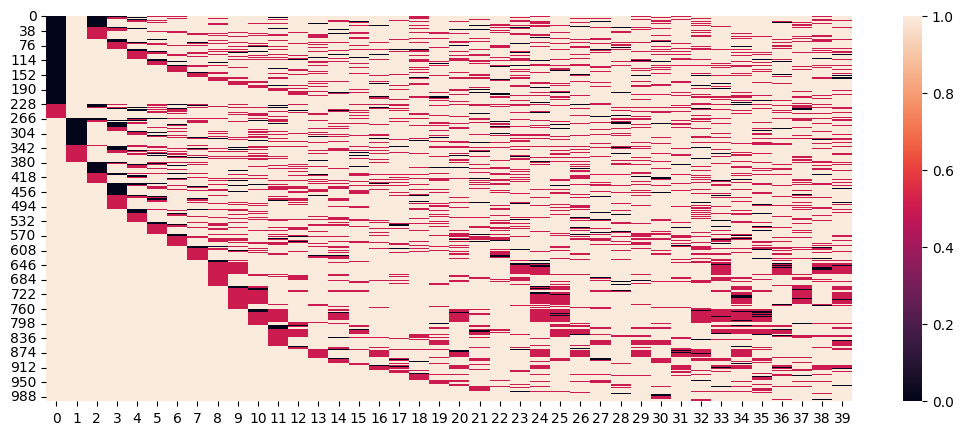

In [21]:
import random
data = []
for i in range(1000):
    random_number = random.randint(1, len(reads1_bins[0]))
    data.append(reads1_bins[0][random_number])
data = sorted(data)
df = pd.DataFrame(data)
p1 = sns.heatmap(df)